In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pathlib
import os

In [2]:
data_dir = './dataset/Cap_XinWei'

In [3]:
data_root = pathlib.Path(data_dir)
all_image_path = list(data_root.glob('*/*'))
len(all_image_path)

148

In [4]:
all_image_path = [str(path) for path in all_image_path]
import random
random.shuffle(all_image_path)
all_image_path[0: 12]

['dataset\\Cap_XinWei\\7Holes\\_25.jpeg',
 'dataset\\Cap_XinWei\\7Holes\\_39.jpeg',
 'dataset\\Cap_XinWei\\19Holes\\_16.jpeg',
 'dataset\\Cap_XinWei\\7Holes\\_68.jpeg',
 'dataset\\Cap_XinWei\\19Holes\\_53.jpeg',
 'dataset\\Cap_XinWei\\7Holes\\_26.jpeg',
 'dataset\\Cap_XinWei\\7Holes\\_43.jpeg',
 'dataset\\Cap_XinWei\\7Holes\\_35.jpeg',
 'dataset\\Cap_XinWei\\19Holes\\_34.jpeg',
 'dataset\\Cap_XinWei\\7Holes\\_49.jpeg',
 'dataset\\Cap_XinWei\\7Holes\\_52.jpeg',
 'dataset\\Cap_XinWei\\7Holes\\_64.jpeg']

In [5]:
image_count = len(all_image_path)
label_names = sorted(item.name for item in data_root.glob('*/'))
label_names

['19Holes', '7Holes']

In [6]:
label_to_index = dict((name, index) for index, name in enumerate(label_names))
label_to_index

{'19Holes': 0, '7Holes': 1}

In [7]:
all_image_label = [label_to_index[pathlib.Path(p).parent.name] for p in all_image_path]
all_image_label[0:12]

[1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1]

In [8]:
import IPython.display as display
index_to_label = dict((v, k) for k, v in label_to_index.items())
index_to_label

{0: '19Holes', 1: '7Holes'}

In [9]:
def load_preprosess_image(img_path):
    img_raw = tf.io.read_file(img_path)
    img_tensor = tf.image.decode_jpeg(img_raw, channels = 3)
    img_tensor = tf.image.resize(img_tensor, [768, 832])  
    img_tensor = tf.cast(img_tensor, tf.float32)
    img = img_tensor / 255
    return img

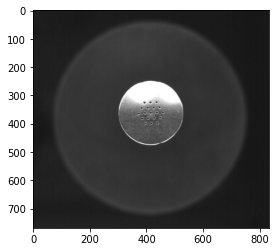

In [10]:
image_temp_path = all_image_path[100]
plt.imshow(load_preprosess_image(image_temp_path))

In [21]:
path_ds = tf.data.Dataset.from_tensor_slices(all_image_path)
image_dataset = path_ds.map(load_preprosess_image)
label_dataset = tf.data.Dataset.from_tensor_slices(all_image_label)
dataset = tf.data.Dataset.zip((image_dataset, label_dataset))
test_count = int(image_count * 0.3)
train_count = image_count - test_count
train_dataset = dataset.skip(test_count)
test_dataset = dataset.take(test_count)
BATCH_SIZE = 3
train_dataset = train_dataset.batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [12]:
covn_base = tf.keras.applications.xception.Xception(weights = 'imagenet',
                                                    include_top = False,
                                                    input_shape = (768, 832, 3),
                                                    pooling = 'avg')

In [13]:
covn_base.trainable = False

In [14]:
model = tf.keras.Sequential()
model.add(covn_base)
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [15]:
model = tf.keras.models.load_model('E:\TF_project\MyProject\My_model\_7Holes&9Holes_Classify.h5')

In [16]:
train_imgs, train_labels = next(iter(train_dataset))
test_imgs, test_labels = next(iter(test_dataset))

# 训练集验证

In [24]:
train_labels[:5].numpy()

array([1, 1, 0, 0, 1])

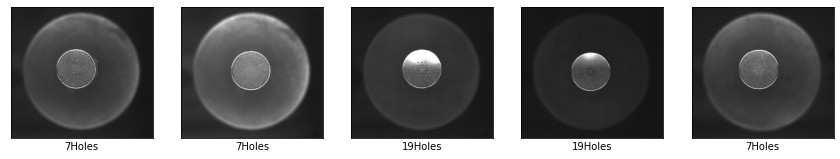

In [19]:
plt.figure(figsize=(30,30))
for train_num in range(5):
    plt.subplot(10,10,train_num+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_imgs[train_num], cmap=plt.cm.binary)
    plt.xlabel(index_to_label[train_labels[train_num].numpy()])
plt.show()

In [22]:
prediction = model.predict(train_dataset)

In [23]:
predict_label = {}
print('预测结果：')
for train_num in range(5):
    if prediction[train_num]>=0.5:
        predict_label[train_num] = 1
    else:
        predict_label[train_num] = 0    
    pre_name = str(index_to_label[predict_label[train_num]])    
    print(predict_label[train_num],',',pre_name)

预测结果：
1 , 7Holes
1 , 7Holes
0 , 19Holes
0 , 19Holes
1 , 7Holes


# 测试集验证

In [25]:
test_labels[:5].numpy()

array([1, 1, 0, 1, 0])

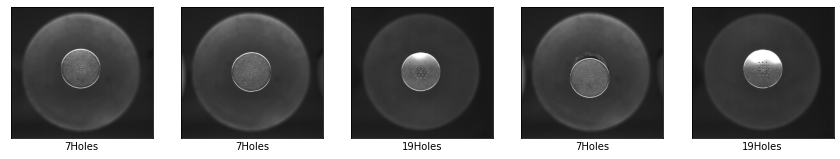

In [26]:
plt.figure(figsize=(30,30))
for test_num in range(5):
    plt.subplot(10,10,test_num+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_imgs[test_num], cmap=plt.cm.binary)
    plt.xlabel(index_to_label[test_labels[test_num].numpy()])
plt.show()

In [27]:
prediction = model.predict(test_dataset)

In [28]:
predict_label = {}
print('预测结果：')
for test_num in range(5):
    if prediction[test_num]>=0.5:
        predict_label[test_num] = 1
    else:
        predict_label[test_num] = 0    
    pre_name = str(index_to_label[predict_label[test_num]])    
    print(predict_label[test_num],',',pre_name)

预测结果：
1 , 7Holes
1 , 7Holes
0 , 19Holes
1 , 7Holes
0 , 19Holes


# 取一张本地图片来验证测试

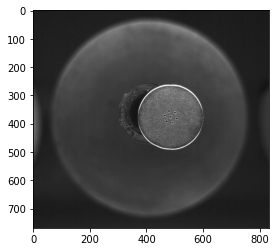

In [46]:
my_image = load_preprosess_image(r'E:\TF_project\MyProject\dataset\cap\Cap_XinWei\7Holes\82.jpeg')
plt.imshow(my_image)

In [47]:
my_image.shape

TensorShape([768, 832, 3])

In [48]:
my_image = np.expand_dims(my_image, 0)
my_image.shape

(1, 768, 832, 3)

In [49]:
pre = model.predict(my_image)
pre

array([[0.70822436]], dtype=float32)

In [50]:
print('预测结果：')
if pre>0.5:
    pre = 1
else:
    pre = 0    
pre_name = str(index_to_label[pre])
print('标识:', pre , ',' , pre_name)

预测结果：
标识: 1 , 7Holes


In [54]:
xlabel = 'Origin_Label:0 , 7Holes  Predict:',pre,pre_name

In [55]:
my_image = np.squeeze(my_image)
my_image.shape

(768, 832, 3)

Text(0.5, 0, "('Origin_Label:0 , 7Holes  Predict:', 1, '7Holes')")

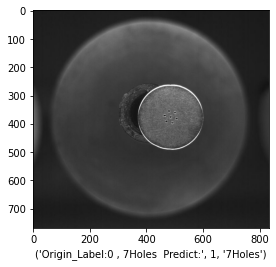

In [56]:
plt.imshow(my_image)
plt.xlabel(xlabel = xlabel)